In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Import data

In [5]:
stu_vle = pd.read_csv('data/studentVle.csv')

In [6]:
stu_as = pd.read_csv('data/studentAssessment.csv')

In [7]:
vle = pd.read_csv('data/vle.csv')

In [8]:
ass = pd.read_csv('data/assessments.csv')

In [9]:
cou = pd.read_csv('data/courses.csv')

In [10]:
stu_reg = pd.read_csv('data/studentRegistration.csv')

In [11]:
stu_info = pd.read_csv('data/studentInfo.csv')

# Load data - first look

In [7]:
cou.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [8]:
ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [26]:
ass['id_assessment'].nunique()

206

In [11]:
ass['assessment_type'].unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

In [12]:
ass['weight'].unique()

array([ 10. ,  20. ,  30. , 100. ,   1. ,   5. ,  18. ,   0. ,  35. ,
         2. ,   7. ,   8. ,   9. ,  22. ,   3. ,   4. ,   6. ,   7.5,
        12.5,  15. ,  17.5,  25. ,  16. ,  28. ])

In [40]:
ass.groupby(['code_module','code_presentation']).size()

code_module  code_presentation
AAA          2013J                 6
             2014J                 6
BBB          2013B                12
             2013J                12
             2014B                12
             2014J                 6
CCC          2014B                10
             2014J                10
DDD          2013B                14
             2013J                 7
             2014B                 7
             2014J                 7
EEE          2013J                 5
             2014B                 5
             2014J                 5
FFF          2013B                13
             2013J                13
             2014B                13
             2014J                13
GGG          2013J                10
             2014B                10
             2014J                10
dtype: int64

In [39]:
exams = ass[ass['assessment_type'] == 'Exam']['id_assessment'].tolist()

In [48]:
taken_exams = stu_as[stu_as.id_assessment.isin(exams)]['id_assessment'].unique().tolist()

In [49]:
ass[ass.id_assessment.isin(taken_exams)]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
87,DDD,2013B,25340,Exam,240.0,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
108,DDD,2014J,25368,Exam,NaN,100.0


In [13]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [27]:
vle['id_site'].nunique()

6364

In [14]:
vle['activity_type'].unique()

array(['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'],
      dtype=object)

In [16]:
vle['activity_type'].value_counts()

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
glossary            21
ouelluminate        21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64

In [17]:
stu_as.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [22]:
stu_as['id_student'].nunique()

23369

In [39]:
len(stu_as.groupby(['id_assessment','id_student']).size())

173912

In [18]:
stu_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [16]:
len(stu_vle)

10655280

In [28]:
stu_vle['id_student'].nunique()

26074

#### Checking for nulls

In [13]:
stu_vle[stu_vle.isna().any(axis=1)]

,code_module,code_presentation,id_student,id_site,date,sum_click


In [32]:
len(stu_vle.groupby(['id_student','id_site']).size())

1960496

In [36]:
stu_vle.groupby(['code_module','code_presentation']).size()

code_module  code_presentation
AAA          2013J                 180982
             2014J                 169316
BBB          2013B                 403266
             2013J                 452638
             2014B                 273236
             2014J                 438424
CCC          2014B                 496181
             2014J                 711646
DDD          2013B                 536837
             2013J                 680806
             2014B                 379942
             2014J                 568901
EEE          2013J                 356262
             2014B                 202224
             2014J                 402947
FFF          2013B                 946765
             2013J                1172101
             2014B                 685274
             2014J                1210359
GGG          2013J                 145995
             2014B                 123319
             2014J                 117859
dtype: int64

#### Student 

In [19]:
stu_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


Here we see that 53% of students did not succeed. (failed or withdrew)

In [20]:
stu_info['final_result'].value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

In [1]:
(10156+7052) / (12361+10156+7052+3024)

0.527966127696131

# EDA

## Total num of clicks per course

In [14]:
course_clicks = stu_vle.groupby(['code_module', 'code_presentation'])['sum_click'].sum()

In [19]:
course_clicks

code_module  code_presentation
AAA          2013J                 648494
             2014J                 598158
BBB          2013B                1347911
             2013J                1378656
             2014B                 833865
             2014J                1673744
CCC          2014B                1889177
             2014J                2792972
DDD          2013B                1387467
             2013J                1757214
             2014B                 947657
             2014J                1437751
EEE          2013J                1535953
             2014B                 832038
             2014J                1616236
FFF          2013B                4220055
             2013J                5116439
             2014B                2975619
             2014J                5281809
GGG          2013J                 509091
             2014B                 425165
             2014J                 399628
Name: sum_click, dtype: int64

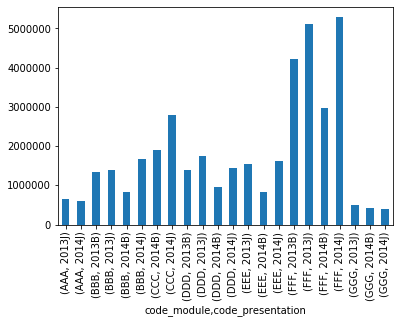

In [25]:
course_clicks.plot.bar()

In [12]:
stu_vle.groupby(['code_module', 'code_presentation'])['sum_click'].agg([sum, min, max])

sum  min   max
code_module code_presentation                    
AAA         2013J               648494    1  1326
            2014J               598158    1   659
BBB         2013B              1347911    1   381
            2013J              1378656    1   212
            2014B               833865    1   223
            2014J              1673744    1  2664
CCC         2014B              1889177    1  1517
            2014J              2792972    1  2853
DDD         2013B              1387467    1   514
            2013J              1757214    1  6977
            2014B               947657    1  3958
            2014J              1437751    1  4953
EEE         2013J              1535953    1  4523
            2014B               832038    1  1497
            2014J              1616236    1  1442
FFF         2013B              4220055    1  4098
            2013J              5116439    1  1836
            2014B              2975619    1   864
            2014J              5281809    1   755
GGG         2013J               509091    1   488
            2014B               425165    1   470
            2014J               399628    1   534

## Course assessment structures

In [10]:
stu_as.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [11]:
ass.groupby(['code_module', 'code_presentation']).count()

id_assessment  assessment_type  date  weight
code_module code_presentation                                              
AAA         2013J                          6                6     5       6
            2014J                          6                6     5       6
BBB         2013B                         12               12    11      12
            2013J                         12               12    11      12
            2014B                         12               12    11      12
            2014J                          6                6     5       6
CCC         2014B                         10               10     8      10
            2014J                         10               10     8      10
DDD         2013B                         14               14    14      14
            2013J                          7                7     7       7
            2014B                          7                7     7       7
            2014J                          7                7     6       7
EEE         2013J                          5                5     5       5
            2014B                          5                5     5       5
            2014J                          5                5     5       5
FFF         2013B                         13               13    13      13
            2013J                         13               13    13      13
            2014B                         13               13    13      13
            2014J                         13               13    13      13
GGG         2013J                         10               10    10      10
            2014B                         10               10    10      10
            2014J                         10               10    10      10

In [12]:
vle.groupby(['code_module', 'code_presentation']).count()

id_site  activity_type  week_from  week_to
code_module code_presentation                                            
AAA         2013J                  211            211          3        3
            2014J                  202            202          3        3
BBB         2013B                  315            315          0        0
            2013J                  321            321         76       76
            2014B                  311            311         76       76
            2014J                  207            207         34       34
CCC         2014B                  196            196          5        5
            2014J                  223            223          5        5
DDD         2013B                  428            428          0        0
            2013J                  462            462          0        0
            2014B                  453            453          1        1
            2014J                  365            365          1        1
EEE         2013J                  112            112         26       26
            2014B                  109            109         26       26
            2014J                  115            115         27       27
FFF         2013B                  508            508         25       25
            2013J                  529            529        283      283
            2014B                  478            478        259      259
            2014J                  452            452        259      259
GGG         2013J                  137            137          4        4
            2014B                  124            124          4        4
            2014J                  106            106          4        4

In [19]:
stu_vle.groupby(['code_module', 'code_presentation'])['id_site'].nunique()

code_module  code_presentation
AAA          2013J                209
             2014J                197
BBB          2013B                315
             2013J                320
             2014B                311
             2014J                206
CCC          2014B                180
             2014J                220
DDD          2013B                408
             2013J                456
             2014B                447
             2014J                361
EEE          2013J                107
             2014B                104
             2014J                110
FFF          2013B                500
             2013J                526
             2014B                475
             2014J                449
GGG          2013J                137
             2014B                124
             2014J                106
Name: id_site, dtype: int64

In [22]:
stu_vle['activity_type'] = stu_vle['id_site'].map(vle.set_index('id_site')['activity_type'])

In [23]:
stu_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent


In [25]:
stu_vle.groupby(['code_module', 'code_presentation', 'activity_type']).count()

id_student  id_site    date  \
code_module code_presentation activity_type                                 
AAA         2013J             dataplus               510      510     510   
                              forumng              57044    57044   57044   
                              glossary               147      147     147   
                              homepage             33429    33429   33429   
                              oucollaborate          159      159     159   
                              oucontent            54607    54607   54607   
                              resource              5506     5506    5506   
                              subpage              20745    20745   20745   
                              url                   8835     8835    8835   
            2014J             dataplus               457      457     457   
                              forumng              49799    49799   49799   
                              glossary               136      136     136   
                              homepage             29907    29907   29907   
                              oucollaborate          183      183     183   
                              oucontent            58207    58207   58207   
                              resource              5686     5686    5686   
                              subpage              17926    17926   17926   
                              url                   7015     7015    7015   
BBB         2013B             forumng             193180   193180  193180   
                              glossary               986      986     986   
                              homepage             76433    76433   76433   
                              oucontent             1129     1129    1129   
                              ouelluminate          1022     1022    1022   
                              quiz                 37918    37918   37918   
                              resource             36852    36852   36852   
                              sharedsubpage           53       53      53   
                              subpage              42076    42076   42076   
                              url                  13617    13617   13617   
            2013J             forumng             191788   191788  191788   
                              glossary              1002     1002    1002   
...                                                  ...      ...     ...   
FFF         2014J             oucontent           321499   321499  321499   
                              ouwiki               15559    15559   15559   
                              page                  7041     7041    7041   
                              questionnaire        14153    14153   14153   
                              quiz                110110   110110  110110   
                              repeatactivity           2        2       2   
                              resource             49036    49036   49036   
                              subpage             261219   261219  261219   
                              url                  36631    36631   36631   
GGG         2013J             forumng              25311    25311   25311   
                              glossary              1233     1233    1233   
                              homepage             31198    31198   31198   
                              oucontent            31154    31154   31154   
                              quiz                 28861    28861   28861   
                              resource             17091    17091   17091   
                              subpage              11147    11147   11147   
            2014B             forumng              22586    22586   22586   
                              glossary               823      823     823   
                              homepage             25154    25154   25154   
                              oucontent   

In [29]:
vle.groupby(['activity_type', 'code_module']).count()

id_site  code_presentation  week_from  week_to
activity_type  code_module                                                
dataplus       AAA                8                  8          0        0
               FFF               20                 20          2        2
dualpane       EEE                3                  3          0        0
               FFF               17                 17          5        5
externalquiz   DDD               26                 26          0        0
folder         FFF                2                  2          0        0
forumng        AAA               21                 21          0        0
               BBB               56                 56          0        0
               CCC               18                 18          0        0
               DDD               53                 53          0        0
               EEE               15                 15          0        0
               FFF               25                 25          0        0
               GGG                6                  6          0        0
glossary       AAA                4                  4          0        0
               BBB                5                  5          0        0
               DDD                5                  5          0        0
               FFF                4                  4          0        0
               GGG                3                  3          0        0
homepage       AAA                2                  2          0        0
               BBB                4                  4          0        0
               CCC                2                  2          0        0
               DDD                4                  4          0        0
               EEE                3                  3          0        0
               FFF                4                  4          0        0
               GGG                3                  3          0        0
htmlactivity   FFF                4                  4          0        0
oucollaborate  AAA                4                  4          0        0
               BBB                6                  6          0        0
               CCC                4                  4          0        0
               DDD               14                 14          0        0
...                             ...                ...        ...      ...
page           FFF               86                 86         33       33
questionnaire  BBB                4                  4          0        0
               FFF               57                 57         42       42
quiz           BBB               19                 19          1        1
               CCC               32                 32          0        0
               EEE                6                  6          0        0
               FFF               44                 44         12       12
               GGG               26                 26          0        0
repeatactivity FFF                5                  5          4        4
resource       AAA              188                188          0        0
               BBB              807                807         88       88
               CCC              163                163          0        0
               DDD              706                706          0        0
               EEE              103                103          0        0
               FFF              454                454         48       48
               GGG              239                239         12       12
sharedsubpage  BBB                3                  3          0        0
subpage        AAA               12                 12          0        0
               BBB              122                122         48       48
               CCC               59                 59          0        0
               DDD              611                61